# Travel Insurance Claim Prediction

## Problem Definition

#### Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

#### As a Data scientist in an insurance company, the hackathon challenge is to analyze the available data and predict whether to sanction the insurance or not.

### Data Description

##### The training dataset consists of data corresponding to 50553 customers and the test dataset consists of 12661 customers. Following are the features of the dataset

Target: Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Gender of insured (Gender)

Age of insured (Age)

The travel agency business model works by the travel agent obtaining discounts from the airlines - because they buy so many flights. The travel agent then sells the flights to consumers with an added fee to cover its own costs.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import resample,shuffle
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 400)

In [6]:
df = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [7]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [9]:
df.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [13]:
df.groupby('Agency Type')['Claim']

Agency Type
Airlines         5522
Travel Agency    3198
Name: Claim, dtype: int64

In [14]:
df[df['Agency Type']=='Airlines']['Claim'].value_counts()

0    11792
1     5522
Name: Claim, dtype: int64

In [16]:
df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()

0    31798
1     3198
Name: Claim, dtype: int64

In [19]:
# percentage of customers for whom insurance were claimed
df[df['Agency Type']=='Airlines']['Claim'].value_counts()[1]/((df[df['Agency Type']=='Airlines']['Claim'].value_counts()[0])+df[df['Agency Type']=='Airlines']['Claim'].value_counts()[1])

0.3189326556543837

In [20]:
# percentage of customers for whom insurance were claimed
df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()[1]/((df[df['Agency Type']=='Airlines']['Claim'].value_counts()[0])+df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()[1])

0.2133422281521014

In [21]:
df[df['Claim']==1]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1
10,3595,EPX,Travel Agency,Online,2 way Comprehensive Plan,83,CHINA,66.823793,0.000000,36,1
11,8195,C2B,Airlines,Online,Silver Plan,22,SINGAPORE,82.550000,20.640000,31,1
14,2165,C2B,Airlines,Online,Bronze Plan,17,SINGAPORE,58.211644,14.552911,66,1
...,...,...,...,...,...,...,...,...,...,...,...
52272,4619,C2B,Airlines,Online,Silver Plan,11,SINGAPORE,29.827737,7.461934,54,1
52277,4521,EPX,Travel Agency,Online,2 way Comprehensive Plan,220,NEPAL,43.014746,0.000000,36,1
52286,4595,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,20.621051,5.159051,28,1
52288,8192,C2B,Airlines,Online,Silver Plan,13,SINGAPORE,53.484565,13.376141,25,1


In [22]:
df.groupby('Claim')['Net Sales'].sum()

Claim
0    1.732955e+06
1    8.069398e+05
Name: Net Sales, dtype: float64

In [23]:
df[df['Claim']==0]['Net Sales'].sum()

1732955.15

In [24]:
df[df['Claim']==1]['Net Sales'].sum()

806939.7984938747

In [25]:
1732955.15 - 806939.7984938747

926015.3515061252

In [31]:
df[(df['Claim']==0) & (df['Net Sales']<0)].shape

(487, 11)

In [32]:
df[(df['Claim']==1) & (df['Net Sales']<0)].shape

(16, 11)

In [33]:
df[(df['Claim']==0) & (df['Net Sales']>0)].shape

(41766, 11)

In [34]:
df[(df['Claim']==1) & (df['Net Sales']>0)].shape

(8704, 11)

In [35]:
df[(df['Claim']==0)]['Commision (in value)'].sum()

417438.19

In [36]:
df[(df['Claim']==1)]['Commision (in value)'].sum()

221788.08897815706

In [38]:
417438.19 - 221788.08897815706 

195650.10102184294

### Data Analysis


#### Univariate Analysis
##### Claim count

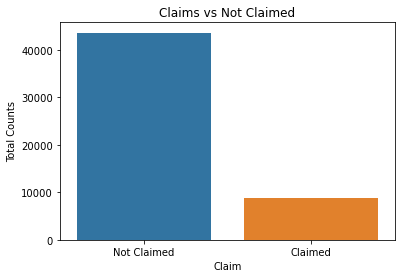

In [42]:
sns.countplot(df['Claim'])
plt.xticks([0,1],["Not Claimed","Claimed"])
plt.ylabel('Total Counts')
plt.title("Claims vs Not Claimed")
plt.show()

Text(0.5, 1.0, 'Top 10 Destination')

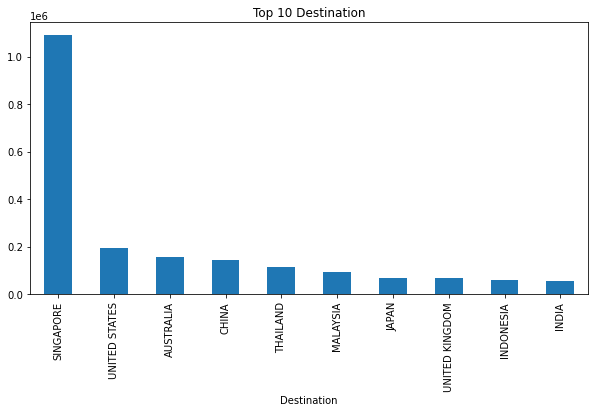

In [47]:
df.groupby('Destination')['Net Sales'].sum().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Top 10 Destination")